# install dependencies

In [ ]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [ ]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 17.5462501085890210, performing 83.7 it/sec
Step 100: Loss = 2.3880685376298358, performing 247.3 it/sec
Step 200: Loss = 0.0853090509943761, performing 303.7 it/sec
Step 300: Loss = 0.0116079055393842, performing 383.5 it/sec
No improvement since Step 293, early stopping.
[Best]  Step 292: Loss = 0.0026212247589108
[Final] Step 342: Loss = 0.0055747225559381

predicted end states
------------------------------------
         5th       Mean      95th
OELF-1  4.50e+00  4.50e+00  4.50e+00
OELF-2  4.50e-03  4.50e-03  4.50e-03
OELF-3  4.50e-06  4.50e-06  4.50e-06
OELF-4  4.58e-09  4.58e-09  4.58e-09
OELF-5  4.38e-09  4.38e-09  4.38e-09
OELF-6  9.73e-12  9.73e-12  9.73e-12
OELF-7  4.50e-10  4.50e-10  4.50e-10
OELF-8  9.88e-12  9.88e-12  9.88e-12


predicted conditional events
----------------------------------------
             5th    

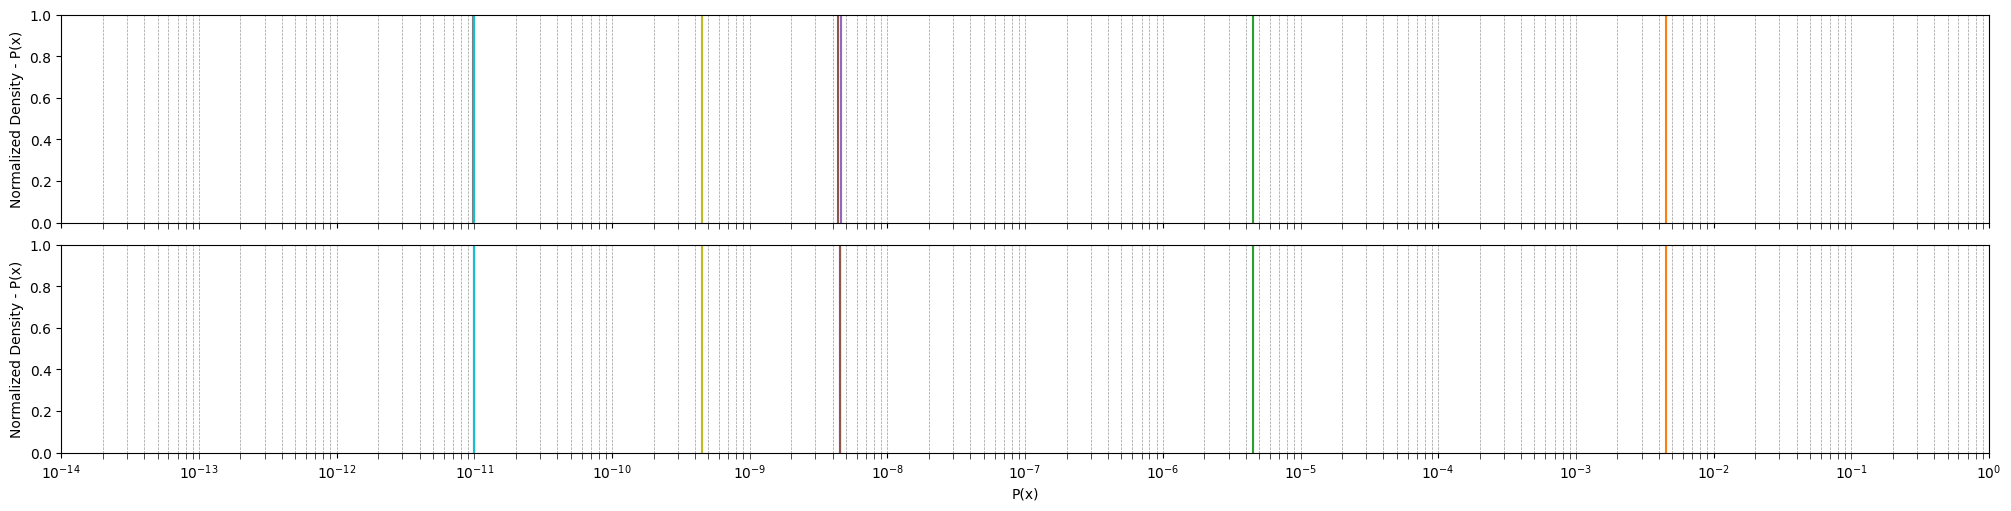

In [ ]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 4.5,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['OELF', 'NPPO', 'SLPE', 'DETP', 'SHTS', 'NSSP|~SHTS', 'NSSP|SHTS', 'NSSP|~DETP'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'OELF-1': {
        'sequence': [1, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.5,
    },
    'OELF-2': {
        'sequence': [1, 1, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.5e-3,
    },
    'OELF-3': {
        'sequence': [1, 1, 1, 0, 0, 0, np.nan, np.nan],
        'probability': 4.5e-6,
    },
    'OELF-4': {
        'sequence': [1, 1, 1, 0, 0, 1, np.nan, np.nan],
        'probability': 4.5e-9,
    },
    'OELF-5': {
        'sequence': [1, 1, 1, 0, 1, np.nan, 0, np.nan],
        'probability': 4.5e-9
    },
    'OELF-6': {
        'sequence': [1, 1, 1, 0, 1, np.nan, 1, np.nan],
        'probability': 1e-11
    },
    'OELF-7': {
        'sequence': [1, 1, 1, 1, np.nan, np.nan, np.nan, 0],
        'probability': 4.5e-10
    },
    'OELF-8': {
        'sequence': [1, 1, 1, 1, np.nan, np.nan, np.nan, 1],
        'probability': 1e-11
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)